# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [3]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.mlab as mlab

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [282]:
normal_sample=np.random.normal(1, 2, 500)
print('Основные статистики для выборки размера 500 из нормального распределения с мат.ожиданием 1 и дисперсией 4')
print('Среднее:',np.mean(normal_sample))
print('Минимум:',min(normal_sample))
print('Максимум:',max(normal_sample))
print('Дисперсия:',np.var(normal_sample))
print('Кривизна:',kurtosis(normal_sample))
print('Смещенность:',sp.stats.skew(normal_sample))

Основные статистики для выборки размера 500 из нормального распределения с мат.ожиданием 1 и дисперсией 4
Среднее: 1.05084824684
Минимум: -4.70587829407
Максимум: 7.91737108069
Дисперсия: 3.52017147571
Кривизна: 0.0625440811518
Смещенность: 0.04055039307895149


In [283]:
chisquare_sample=np.random.chisquare(3,500)
print('Основные статистики для выборки размера 500 из хи-квадрат распределения с k=3')
print('Среднее:',np.mean(chisquare_sample))
print('Минимум:',min(chisquare_sample))
print('Максимум:',max(chisquare_sample))
print('Дисперсия:',np.var(chisquare_sample))
print('Кривизна:',kurtosis(chisquare_sample))
print('Смещенность:',sp.stats.skew(chisquare_sample))

Основные статистики для выборки размера 500 из хи-квадрат распределения с k=3
Среднее: 2.98652638583
Минимум: 0.0254841853861
Максимум: 15.958180708
Дисперсия: 6.02151101422
Кривизна: 2.06268268038
Смещенность: 1.3428158052536323


In [284]:
poisson_sample=np.random.poisson(10,500)
print('Основные статистики для выборки размера 500 из пуассоновского распределения с lambda=10')
print('Среднее:',np.mean(poisson_sample))
print('Минимум:',min(poisson_sample))
print('Максимум:',max(poisson_sample))
print('Дисперсия:',np.var(poisson_sample))
print('Кривизна:',kurtosis(poisson_sample))
print('Смещенность:',sp.stats.skew(poisson_sample))

Основные статистики для выборки размера 500 из пуассоновского распределения с lambda=10
Среднее: 10.122
Минимум: 1
Максимум: 22
Дисперсия: 10.591116
Кривизна: 0.103849912142
Смещенность: 0.23464955392317696


**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

In [285]:
#Создаем эмпирическую функцию распределения
def cdf(sample, x):
  return(len([i for i in sample if i<=x])/sample.size)
#Создаем функцию для генерирования np.array, состоящего из значений функции распределения для соответствующих квантилей.
def function(sample, quantile):
    s = []
    for i in quantile:
     s.append(cdf(sample,i))
    return np.array(s)

#Задаем np.array, состоящий из квантилей.
range_norm = np.linspace(min(normal_sample), max(normal_sample), 500)
range_chis = np.linspace(min(chisquare_sample), max(chisquare_sample), 500)
range_poiss = np.linspace(min(poisson_sample), max(poisson_sample), 500)

bins_norm = np.linspace(min(normal_sample), max(normal_sample), 20)
bins_chis = np.linspace(min(chisquare_sample), max(chisquare_sample), 20)
bins_poiss = np.linspace(min(poisson_sample), max(poisson_sample), 10)

Графики распределения и плотности для выборки размера 500 из нормального распределения с мат. ожиданием 1 и дисперсией 4


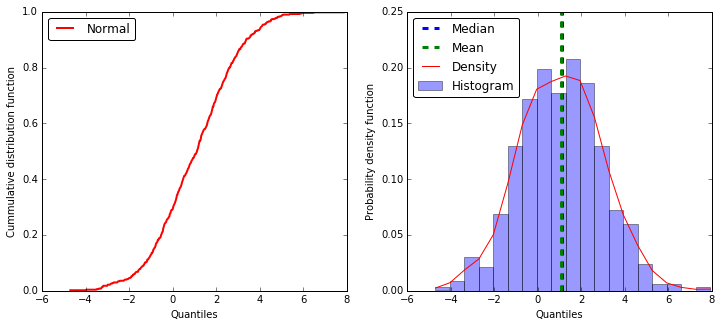

In [290]:
print('Графики распределения и плотности для выборки размера 500 из нормального распределения с мат. ожиданием 1 и дисперсией 4')
fig = plt.figure(figsize=(12, 5))

#Задаем график функции распределения
ax = fig.add_subplot(121)
ax.plot(range_norm, function(normal_sample,range_norm), '-r', lw=2, label='Normal')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Cummulative distribution function')
ax.legend(fancybox=True, loc='upper left')

ax = fig.add_subplot(122)
#Задаем гистограмму
plt.hist(normal_sample, bins_norm, alpha=0.4, normed=1, label='Histogram')
#Вычисляем медиану и среднее
plt.axvline(np.median(normal_sample), color='b', linestyle='dashed', linewidth=3, label='Median')
plt.axvline(np.mean(normal_sample), color='g', linestyle='dashed', linewidth=3, label='Mean')
#Задаем эмпирическую функцию плотности
pdf_est_norm = stats.gaussian_kde(normal_sample)
pdf_normal = pdf_est_norm.evaluate(bins_norm)
plt.plot(bins_norm, pdf_normal, label='Density', color="r")

ax.set_xlabel('Quantiles')
ax.set_ylabel('Probability density function')
ax.legend(fancybox=True, loc='upper left')

plt.show()

Графики распределения и плотности для выборки размера 500 из хи-квадрат распределения с k=3


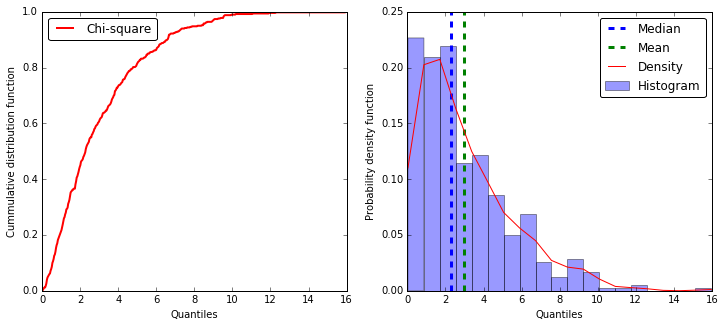

In [291]:
print('Графики распределения и плотности для выборки размера 500 из хи-квадрат распределения с k=3')
fig = plt.figure(figsize=(12, 5))
#Задаем график функции распределения
ax = fig.add_subplot(121)
ax.plot(range_chis, function(chisquare_sample,range_chis), '-r', lw=2, label='Chi-square')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Cummulative distribution function')
ax.legend(fancybox=True, loc='upper left')

ax = fig.add_subplot(122)
#Задаем гистограмму
plt.hist(chisquare_sample, bins_chis, alpha=0.4, normed=1, label='Histogram')
#Вычисляем медиану и среднее
plt.axvline(np.median(chisquare_sample), color='b', linestyle='dashed', linewidth=3, label='Median')
plt.axvline(np.mean(chisquare_sample), color='g', linestyle='dashed', linewidth=3, label='Mean')
#Задаем эмпирическую функцию плотности
pdf_est_chi = stats.gaussian_kde(chisquare_sample)
pdf_chis = pdf_est_chi.evaluate(bins_chis)
plt.plot(bins_chis, pdf_chis, label='Density', color="r")

ax.set_xlabel('Quantiles')
ax.set_ylabel('Probability density function')
ax.legend(fancybox=True, loc='upper right')

plt.show()

Графики распределения и плотности для выборки размера 500 из пуассоновского распределения с lambda=10


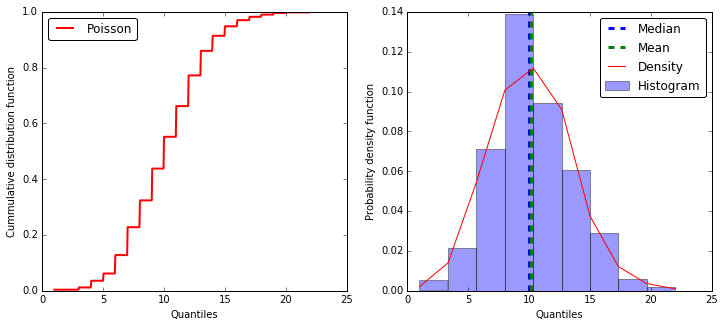

In [292]:
print('Графики распределения и плотности для выборки размера 500 из пуассоновского распределения с lambda=10')
fig = plt.figure(figsize=(12, 5))
#Задаем график функции распределения
ax = fig.add_subplot(121)
ax.plot(range_poiss, function(poisson_sample,range_poiss), '-r', lw=2, label='Poisson')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Cummulative distribution function')
ax.legend(fancybox=True, loc='upper left')

ax = fig.add_subplot(122)
#Задаем гистограмму
plt.hist(poisson_sample, bins_poiss, alpha=0.4, normed=1, label='Histogram')
#Вычисляем медиану и среднее
plt.axvline(np.median(poisson_sample), color='b', linestyle='dashed', linewidth=3, label='Median')
plt.axvline(np.mean(poisson_sample), color='g', linestyle='dashed', linewidth=3, label='Mean')
#Задаем эмпирическую функцию плотности
pdf_est_poiss = stats.gaussian_kde(poisson_sample)
pdf_poiss = pdf_est_poiss.evaluate(bins_poiss)
plt.plot(bins_poiss, pdf_poiss, label='Density', color="r")

ax.set_xlabel('Quantiles')
ax.set_ylabel('Probability density function')
ax.legend(fancybox=True, loc='upper right')

plt.show()

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [293]:
print('Набор статистик для выборки размера 500 из нормального распределения с мат.ожиданием 1 и дисперсией 4')
print("Количество наблюдений: {0:8.6f}".format(sp.stats.describe(normal_sample)[0]))
print("Среднее: {0:8.6f}".format(sp.stats.describe(normal_sample)[2]))
print("Минимум: {0:8.6f}".format(sp.stats.describe(normal_sample)[1][0]))
print("Максисмум: {0:8.6f}".format(sp.stats.describe(normal_sample)[1][1]))
print("Дисперсия: {0:8.6f}".format(sp.stats.describe(normal_sample)[3]))
print("Кривизна: {0:8.6f}".format(sp.stats.describe(normal_sample)[5]))
print("Смещенность: {0:8.6f}".format(sp.stats.describe(normal_sample)[4]))
print('Набор статистик для выборки размера 500 из хи-квадрат распределения с k=3')
print("Количество наблюдений: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[0]))
print("Среднее: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[2]))
print("Минимум: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[1][0]))
print("Максисмум: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[1][1]))
print("Дисперсия: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[3]))
print("Кривизна: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[5]))
print("Смещенность: {0:8.6f}".format(sp.stats.describe(chisquare_sample)[4]))
print('Набор статистик для выборки размера 500 из пуассоновского распределения с лямбдой, равной 4')
print("Количество наблюдений: {0:8.6f}".format(sp.stats.describe(poisson_sample)[0]))
print("Среднее: {0:8.6f}".format(sp.stats.describe(poisson_sample)[2]))
print("Минимум: {0:8.6f}".format(sp.stats.describe(poisson_sample)[1][0]))
print("Максисмум: {0:8.6f}".format(sp.stats.describe(poisson_sample)[1][1]))
print("Дисперсия: {0:8.6f}".format(sp.stats.describe(poisson_sample)[3]))
print("Кривизна: {0:8.6f}".format(sp.stats.describe(poisson_sample)[5]))
print("Смещенность: {0:8.6f}".format(sp.stats.describe(poisson_sample)[4]))

Набор статистик для выборки размера 500 из нормального распределения с мат.ожиданием 1 и дисперсией 4
Количество наблюдений: 500.000000
Среднее: 1.050848
Минимум: -4.705878
Максисмум: 7.917371
Дисперсия: 3.527226
Кривизна: 0.074831
Смещенность: 0.040550
Набор статистик для выборки размера 500 из хи-квадрат распределения с k=3
Количество наблюдений: 500.000000
Среднее: 2.986526
Минимум: 0.025484
Максисмум: 15.958181
Дисперсия: 6.033578
Кривизна: 2.082994
Смещенность: 1.342816
Набор статистик для выборки размера 500 из пуассоновского распределения с лямбдой, равной 4
Количество наблюдений: 500.000000
Среднее: 10.122000
Минимум: 1.000000
Максисмум: 22.000000
Дисперсия: 10.612341
Кривизна: 0.116303
Смещенность: 0.234650


## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

In [ ]:
#Коэффициент Пирсона измеряет только линейную зависимость между переменными (при такой зависимости изменение одной переменной ведет 
#к пропорциональному изменению другой). Коэффициент Спирмена измеряет монотонную зависимость между переменными, при которой изменение
#одной переменной не обязательно ведет к пропорциональному изменению другой переменной.

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [295]:
#Загружаем файл и создаем dataframe
beauty = pd.read_csv('beauty.csv', sep=';')
#Создаем список признаков
list_names=list(beauty.columns.values)

In [312]:
spisok1=[]
#Выводим топ-3 коррелированных пар признаков.
for i in range(len(list_names)):
    if i!=len(list_names)-1:
        for k in range(i+1,len(list_names)):
            spisok1.append([abs(np.correlate(beauty[list_names[i]],beauty[list_names[k]])[0]),list_names[i],
                               list_names[k], 'positive relation' if 
                            np.correlate(beauty[list_names[i]],beauty[list_names[k]])[0]>0 else 'negative relation'])
print('Топ-3 пары по коррелированности в порядке возрастания')
for i in range(len(spisok1)-3,len(spisok1)):
        print(sorted(spisok1)[i])

Топ-3 пары по коррелированности в порядке возрастания
[103104.80000000002, 'wage', 'educ', 'positive relation']
[161146.34999999998, 'wage', 'exper', 'positive relation']
[280846, 'exper', 'educ', 'positive relation']


In [313]:
#Метод numpy.correlate вычисляет значение взаимнокорреляционной функции для двух последовательностей чисел. Как видим, наиболее
#коррелированная пара исходя из этого метода - опыт работы и образование, причем поскольку связь положительная, получаем следующий вывод:
#чем выше уровень образования работника, тем выше его опыт работы. Вторая и третья пары по степени коррелированности - зарплата и
#опыт работы и зарплата и образование соответственно. Опять же, в силу положительной корреляции получаем следующие зависимости: чем 
#выше зарплата, тем больше опыт, и чем выше зарплата, тем выше уровень образования.

In [314]:
spisok2=[]
#Выводим топ-3 коррелированных пар признаков.
for i in range(len(list_names)):
    if i!=len(list_names)-1:
        for k in range(i+1,len(list_names)):
            spisok2.append([abs(np.corrcoef(beauty[list_names[i]],beauty[list_names[k]])[1][0]),list_names[i],
                               list_names[k], 'positive relation' if 
                        np.corrcoef(beauty[list_names[i]],beauty[list_names[k]])[1][0]>0 else 'negative relation'])
print('Топ-3 пары по коррелированности в порядке возрастания')
for i in range(len(spisok2)-3,len(spisok2)):
        print(sorted(spisok2)[i])

Топ-3 пары по коррелированности в порядке возрастания
[0.30162847441178714, 'service', 'educ', 'positive relation']
[0.31341944158697133, 'wage', 'female', 'negative relation']
[0.31922793439835612, 'female', 'married', 'negative relation']


In [322]:
#Метод np.corrcoef вычисляет коэффициент корреляции Пирсона для двух величин, т.е измеряет линейную зависимость между ними. 
#Исходя из результатов вычисления можно сделать следующие выводы: вероятность того, что случайно выбранный мужчина женат, выше, чем
#вероятность того, что случайно выбранная женщина замужем, также у мужчин при прочих равных зарплаты выше, чем у женщин, и, наконец,
#у работников, занятых в сфере обслуживания, при прочих равных уровень образования выше (измеряется количеством лет обучения), чем у 
#работников из других сфер.

In [316]:
spisok3=[]
#Выводим топ-3 коррелированных пар признаков.
for i in range(len(list_names)):
    if i!=len(list_names)-1:
        for k in range(i+1,len(list_names)):
            spisok3.append([abs(sp.stats.spearmanr(beauty[list_names[i]],beauty[list_names[k]])[0]),list_names[i],
                               list_names[k], 'positive relation' if 
                        sp.stats.spearmanr(beauty[list_names[i]],beauty[list_names[k]])[0]>0 else 'negative relation'])
print('Топ-3 пары по коррелированности в порядке возрастания')
for i in range(len(spisok3)-3,len(spisok3)):
        print(sorted(spisok3)[i])

Топ-3 пары по коррелированности в порядке возрастания
[0.31922793439835601, 'female', 'married', 'negative relation']
[0.36086106027985237, 'wage', 'exper', 'positive relation']
[0.44884381779273641, 'wage', 'female', 'negative relation']


In [317]:
#Метод sp.stats.spearmanr вычисляет коэффициент корреляции Спирмена для двух величин, т.е измеряет монотонную зависимость между 
#ними.Исходя из данного метода при прочих равных у женщин зарплата ниже, чем у мужчин. Также вероятность того, что случайно 
#выбранный мужчина женат, выше, чем вероятность того, что случайно выбранная женщина замужем. При этом,существует положительная 
#связь между уровнем зарплаты и опытом работы.

In [321]:
spisok4=[]
#Выводим топ-3 коррелированных пар признаков.
for i in range(len(list_names)):
    if i!=len(list_names)-1:
        for k in range(i+1,len(list_names)):
            spisok4.append([abs(sp.stats.pearsonr(beauty[list_names[i]],beauty[list_names[k]])[0]),list_names[i],
                               list_names[k], 'positive relation' if 
                    sp.stats.pearsonr(beauty[list_names[i]],beauty[list_names[k]])[0]>0 else 'negative relation'])
print('Топ-3 пары по коррелированности в порядке возрастания')
for i in range(len(spisok4)-3,len(spisok4)):
        print(sorted(spisok4)[i])

Топ-3 пары по коррелированности в порядке возрастания
[0.30162847441178731, 'service', 'educ', 'positive relation']
[0.31341944158697127, 'wage', 'female', 'negative relation']
[0.31922793439835595, 'female', 'married', 'negative relation']


In [319]:
#Метод sp.stats.pearsonr вычисляет коэффициент корреляции Пирсона для двух величин, т.е измеряет линейную зависимость между ними. 
#Исходя из результатов вычисления можно сделать следующие выводы: вероятность того, что случайно выбранный мужчина женат, выше, чем
#вероятность того, что случайно выбранная женщина замужем, также у мужчин при прочих равных зарплаты выше, чем у женщин, и, наконец,
#у работников, занятых в сфере обслуживания, при прочих равных уровень образования выше, чем у работников из других сфер.

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


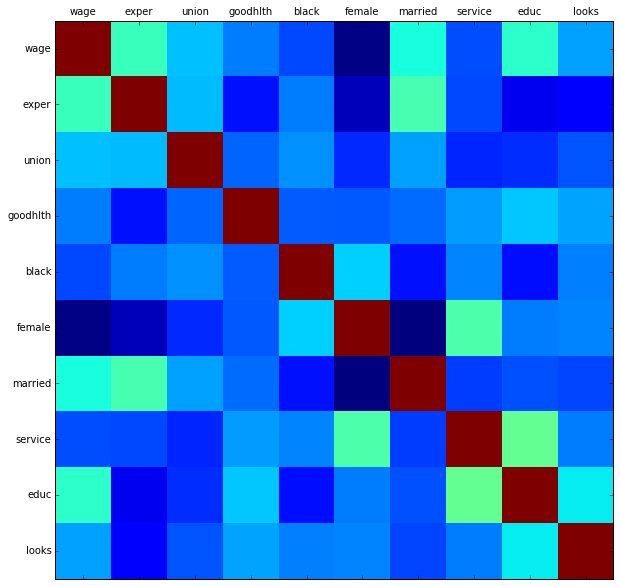

In [320]:
#Создаем функцию, генерирующую корреляционную матрицу
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(beauty,10)
beauty.corr()

In [33]:
#Наиболее коррелированными (по методу pandas.DataFrame.corr) оказались пары(в порядке убывания абсолютной величины корреляции):
#(married, female; корреляция = -0.319228), (wage, female; корреляция = -0.313419), (service, educ; корреляция = 0.301628).
#Данные результаты интерпретируются следующим образом: вероятность того, что случайно выбранный мужчина женат, выше, чем
#вероятность того, что случайно выбранная женщина замужем, у мужчин при прочих равных зарплаты выше, чем у женщин, и у работников, 
#занятых в сфере обслуживания, при прочих равных уровень образования выше, чем у работников из других сфер.

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

In [323]:
#Создаем отрезки для гистограммы
bins_wage = np.linspace(min(beauty['wage']), max(beauty['wage']),15)
bins_exper = np.linspace(min(beauty['exper']), max(beauty['exper']),10)
bins_union = np.linspace(min(beauty['union']), max(beauty['union']),3)
bins_goodhlth = np.linspace(min(beauty['goodhlth']), max(beauty['goodhlth']),3)
bins_black = np.linspace(min(beauty['black']), max(beauty['black']),3)
bins_female = np.linspace(min(beauty['female']), max(beauty['female']),3)
bins_married = np.linspace(min(beauty['married']), max(beauty['married']),3)
bins_service = np.linspace(min(beauty['service']), max(beauty['service']),3)
bins_educ = np.linspace(min(beauty['educ']), max(beauty['educ']),17)
bins_looks = np.linspace(min(beauty['looks']), max(beauty['looks']),5)

Закон распределения зарплаты - Нормальное распределение
Параметр x_m: 0.610361284169
Параметр k: 1.01923443289


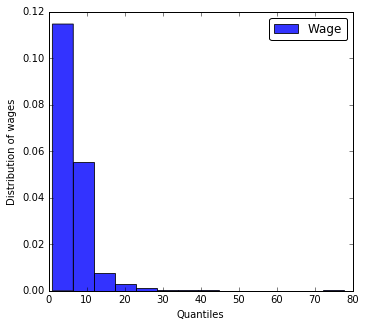

In [324]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['wage'], bins_wage, alpha=0.8, normed=1, label='Wage')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of wages')
ax.legend(fancybox=True, loc='upper right')
#Вычисляем параметры распределения
print('Закон распределения зарплаты - Нормальное распределение')
print('Параметр x_m:',sp.stats.pareto.fit(beauty['wage'])[0])
print('Параметр k:',sp.stats.pareto.fit(beauty['wage'])[2])

Закон распределения опыта - Логнормальное распределение
Параметр mu: 0.510244712139
Параметр sigma: 0.00168804484164


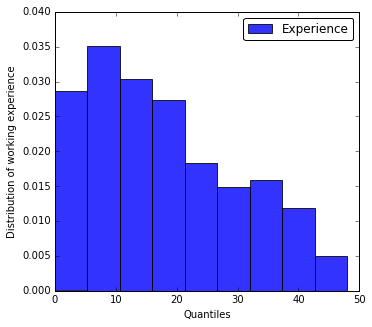

In [325]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['exper'], bins_exper, alpha=0.8, normed=1, label='Experience')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of working experience')
ax.legend(fancybox=True, loc='upper right')
#Вычисляем параметры распределения
print('Закон распределения опыта - Логнормальное распределение')
print('Параметр mu:',sp.stats.lognorm.fit(beauty['exper'])[0])
print('Параметр sigma:',np.exp(sp.stats.lognorm.fit(beauty['exper'])[1]))

Закон распределения бинарной величины union(1, если опрошенный входит в профсоюз, 0 - иначе) - распределение Бернулли
Вероятность успеха (выпадения 1): 0.2722222222222222


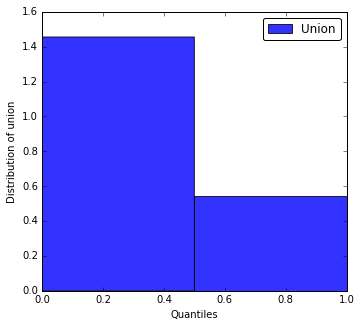

In [326]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['union'], bins_union, alpha=0.8, normed=1, label='Union')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of union')
ax.legend(fancybox=True, loc='upper right')
#Вычисляем параметры распределения
print('Закон распределения бинарной величины union(1, если опрошенный входит в профсоюз, 0 - иначе) - распределение Бернулли')
print('Вероятность успеха (выпадения 1):',pd.DataFrame.sum(beauty['union'])/len(beauty['union']))

Закон распределения бинарной величины goodhealth(1, если у опрошенного хорошее здоровье, 0 - иначе) - распределение Бернулли
Вероятность успеха (выпадения 1): 0.9333333333333333


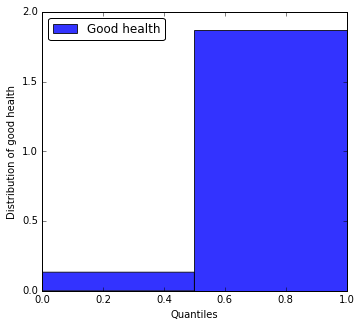

In [327]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['goodhlth'], bins_goodhlth, alpha=0.8, normed=1, label='Good health')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of good health')
ax.legend(fancybox=True, loc='upper left')
#Вычисляем параметры распределения
print('Закон распределения бинарной величины goodhealth(1, если у опрошенного хорошее здоровье, 0 - иначе) - распределение Бернулли')
print('Вероятность успеха (выпадения 1):',pd.DataFrame.sum(beauty['goodhlth'])/len(beauty['goodhlth']))

Закон распределения бинарной величины black(1, если опрошенный-темнокожий, 0 - иначе) - распределение Бернулли
Вероятность успеха (выпадения 1): 0.07380952380952381


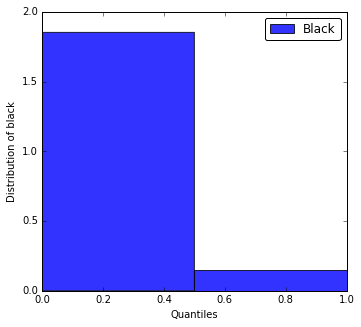

In [328]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['black'], bins_black, alpha=0.8, normed=1, label='Black')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of black')
ax.legend(fancybox=True, loc='upper right')
#Вычисляем параметры распределения
print('Закон распределения бинарной величины black(1, если опрошенный-темнокожий, 0 - иначе) - распределение Бернулли')
print('Вероятность успеха (выпадения 1):',pd.DataFrame.sum(beauty['black'])/len(beauty['black']))

Закон распределения бинарной величины female(1, если женщина, 0 - мужчина) - распределение Бернулли
Вероятность успеха (выпадения 1): 0.346031746031746


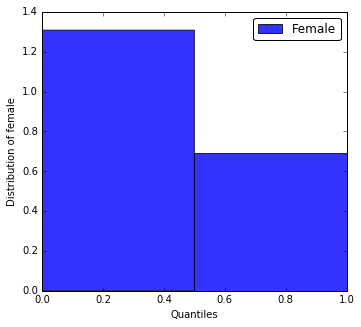

In [329]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
plt.hist(beauty['female'], bins_female, alpha=0.8, normed=1, label='Female')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of female')
ax.legend(fancybox=True, loc='upper right')
#Вычисляем параметры распределения
print('Закон распределения бинарной величины female(1, если женщина, 0 - мужчина) - распределение Бернулли')
print('Вероятность успеха (выпадения 1):',pd.DataFrame.sum(beauty['female'])/len(beauty['female']))

Закон распределения бинарной величины married(1, если опрошенный состоит в браке, 0 - иначе) - распределение Бернулли
Вероятность успеха (выпадения 1): 0.6912698412698413


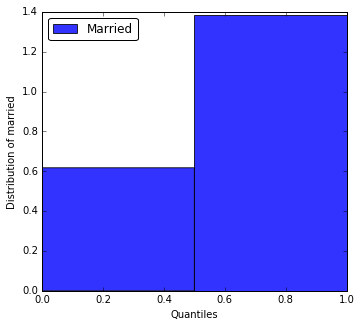

In [330]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['married'], bins_married, alpha=0.8, normed=1, label='Married')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of married')
ax.legend(fancybox=True, loc='upper left')
#Вычисляем параметры распределения
print('Закон распределения бинарной величины married(1, если опрошенный состоит в браке, 0 - иначе) - распределение Бернулли')
print('Вероятность успеха (выпадения 1):',pd.DataFrame.sum(beauty['married'])/len(beauty['married']))

Закон распределения бинарной величины service(1, если опрошенный занят в сфере услуг, 0 - иначе) - распределение Бернулли
Вероятность успеха (выпадения 1): 0.27380952380952384


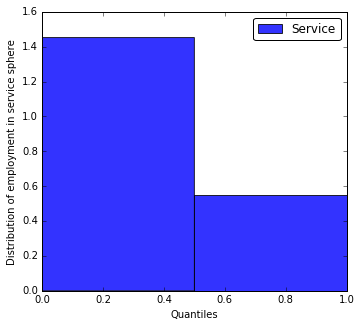

In [331]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['service'], bins_service, alpha=0.8, normed=1, label='Service')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of employment in service sphere')
ax.legend(fancybox=True, loc='upper right')
#Вычисляем параметры распределения
print('Закон распределения бинарной величины service(1, если опрошенный занят в сфере услуг, 0 - иначе) - распределение Бернулли')
print('Вероятность успеха (выпадения 1):',pd.DataFrame.sum(beauty['service'])/len(beauty['service']))

Закон распределения бинарной уровня образования (по количеству лет обучения) - нормальное распределение
Мат. ожидание: 12.5634920635
Стандартное отклонение: 2.62344748268


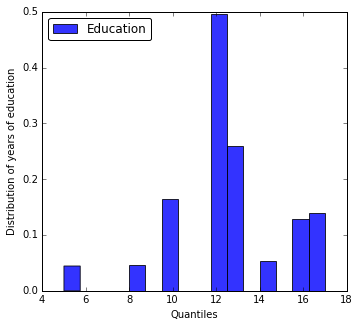

In [332]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['educ'], bins_educ, alpha=0.8, normed=1, label='Education')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of years of education')
ax.legend(fancybox=True, loc='upper left')
#Вычисляем параметры распределения
print('Закон распределения бинарной уровня образования (по количеству лет обучения) - нормальное распределение')
print('Мат. ожидание:',sp.stats.norm.fit(beauty['educ'])[0])
print('Стандартное отклонение:',sp.stats.norm.fit(beauty['educ'])[1])

Закон распределения бинарной внешней привлекательности(по шкале от 1 до 5) - нормальное распределение
Мат. ожидание: 3.18571428571
Стандартное отклонение: 0.684605585178


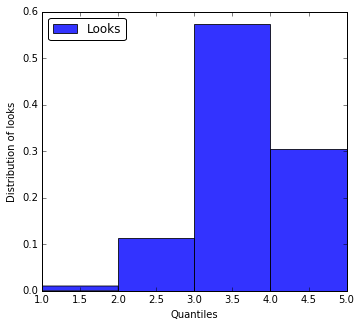

In [333]:
#Создаем гистограмму
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)

plt.hist(beauty['looks'], bins_looks, alpha=0.8, normed=1, label='Looks')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Distribution of looks')
ax.legend(fancybox=True, loc='upper left')
#Вычисляем параметры распределения
print('Закон распределения бинарной внешней привлекательности(по шкале от 1 до 5) - нормальное распределение')
print('Мат. ожидание:',sp.stats.norm.fit(beauty['looks'])[0])
print('Стандартное отклонение:',sp.stats.norm.fit(beauty['looks'])[1])

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [242]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [243]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [244]:
categories = ['sci.med','rec.sport.hockey' ]
#Загружаем в датасет нужные нам категории.
news = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
text_all = news.data
text_train, text_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.3, random_state=42)

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [245]:
#Создаем конвертер из текстов в частотную матрицу.
count_vect = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
count_vect.fit(text_all)
#Создаем частотную матрицу для выборок train и test, в которой элемент a[i,j] равен количеству появлений j-ого слова в i-ом тексте.
X_train = count_vect.transform(text_train).toarray()
X_test = count_vect.transform(text_test).toarray()
print(X_test, 'Размерность матрицы: ',X_test.shape)
print(X_train,'Размерность матрицы: ',X_train.shape)

[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 4 12  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]] Размерность матрицы:  (597, 30726)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] Размерность матрицы:  (1392, 30726)


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [114]:
occurence_data = pd.DataFrame({'Количество вхождений слова в тексты':np.sum(X_train, axis=0),
                               'Слово':count_vect.get_feature_names()})
top_50_words = occurence_data.sort_values(['Количество вхождений слова в тексты'], ascending = False)[:50]
top_50_words

,Количество вхождений слова в тексты,Слово
11101,2695,edu
26853,1465,subject
20713,1414,organization
17509,1403,lines
8347,1224,com
30391,956,writes
5071,918,article
7076,877,ca
28972,814,university
13099,803,game


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [263]:
clf1 = MultinomialNB(alpha = 1).fit(X_train, y_train)
prediction1 = clf1.predict(X_test)
probabilities1 = clf1.predict_proba(X_test)
print('Точность совпадения меток = ', np.mean(prediction1 == y_test)) 
print('Вероятности:', probabilities1)

Точность совпадения меток =  0.994974874372
Вероятности: [[  1.00000000e+000   3.77990659e-036]
 [  4.57317522e-035   1.00000000e+000]
 [  1.00000000e+000   4.87211937e-020]
 ..., 
 [  1.00000000e+000   0.00000000e+000]
 [  1.91367191e-025   1.00000000e+000]
 [  4.05037356e-138   1.00000000e+000]]


**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [265]:
clf2 = MultinomialNB(alpha = 0).fit(X_train, y_train)
prediction2 = clf2.predict(X_test)
probabilities2 = clf2.predict_proba(X_test)
print('Точность совпадения меток:', np.mean(prediction2 == y_test))
print('Вероятности:', probabilities2)

Точность совпадения меток: 0.509212730318
Вероятности: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


Точность оценки снизилась до 0.5. Для того чтобы понять причину данного изменения, нужно сначала разобраться, за что отвечает параметр alpha. Вероятность того, что какое-либо слово $w$ встретится в тексте из класса $C$, равна $P(w|C)=\frac{x}{N}$, где $x$ - количество раз, когда слово $w$ встречалось в текстах из класса $C$, а $N$ - общее количество слов в текстах (из выборки) из класса $C$. При применении классификатора на тестовой выборке может случиться так, что в тексте, принадлежащему классу $M$, встречается слово $p$, которое не встречалось ни в одном из обучающих текстов, принадлежащих классу $M$, т.е. $P(p|M)=0$, что равносильно тому, что вероятность того, что данный текст принадлежит классу $M$, равна нулю несмотря на то, что этот текст действительно принадлежит классу $M$. В итоге данный текст скорее всего будет отнесен к другому классу. Однако если считать вероятность того, что какое-либо слово $w$ встретится в тексте из класса $C$, как $P(w|C)=\frac{x+\alpha}{N+\alpha*d}$, то при ненулевом alpha даже если в обучающих текстах, принадлежащих классу $C$, не встречалось слово $w$, вероятность $P(w|C)$ ненулевая и, таким образом, шанс ошибочной классификации, описанной на примере класса $M$ и слова $p$, уменьшается и мы получаем более высокую точность оценки.